# Graph visualization example for Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

C:\Users\libphy\AppData\Local\Continuum\anaconda3\envs\skl22dev\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv("Heart.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [4]:
df.head()

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [ ]:
### Below example shows how to use preprocessing pipeline in sklearn. Although you can manually clean up X, 
### using the pipeline can be convenient 

In [6]:
y = df['AHD']
X = df.drop('AHD',axis=1)

categorical_features = ['Sex','ChestPain', 'Thal']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = list(set(X.columns)-set(categorical_features))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

## You can add scaler if you want to scale the numeric features. For comparison, I didn't include here
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

In [7]:
len(X.columns)

13

In [8]:
clf.fit(X,y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [9]:
Xt = preprocessor.transform(X) #you can explicitly get transformed (preprocessed) X

In [10]:
Xt.shape # since we have categorical variables, it expanded columns

(303, 20)

In [11]:
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [ ]:
#### Caution: using ColumnTransformer/Pipeline changes the clf object and the tree_ is no longer available so it's not compatible with the graphviz 

In [15]:
### you can pull the names of the categorical features by
new_cat_features=preprocessor.transformers_[1][1]['onehot']\
                         .get_feature_names(categorical_features)

In [ ]:
### Below example is when using numpy array to visualize the tree
### Since it's numpy array, the visualization doesn't show the column (feature names)

In [12]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(Xt,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

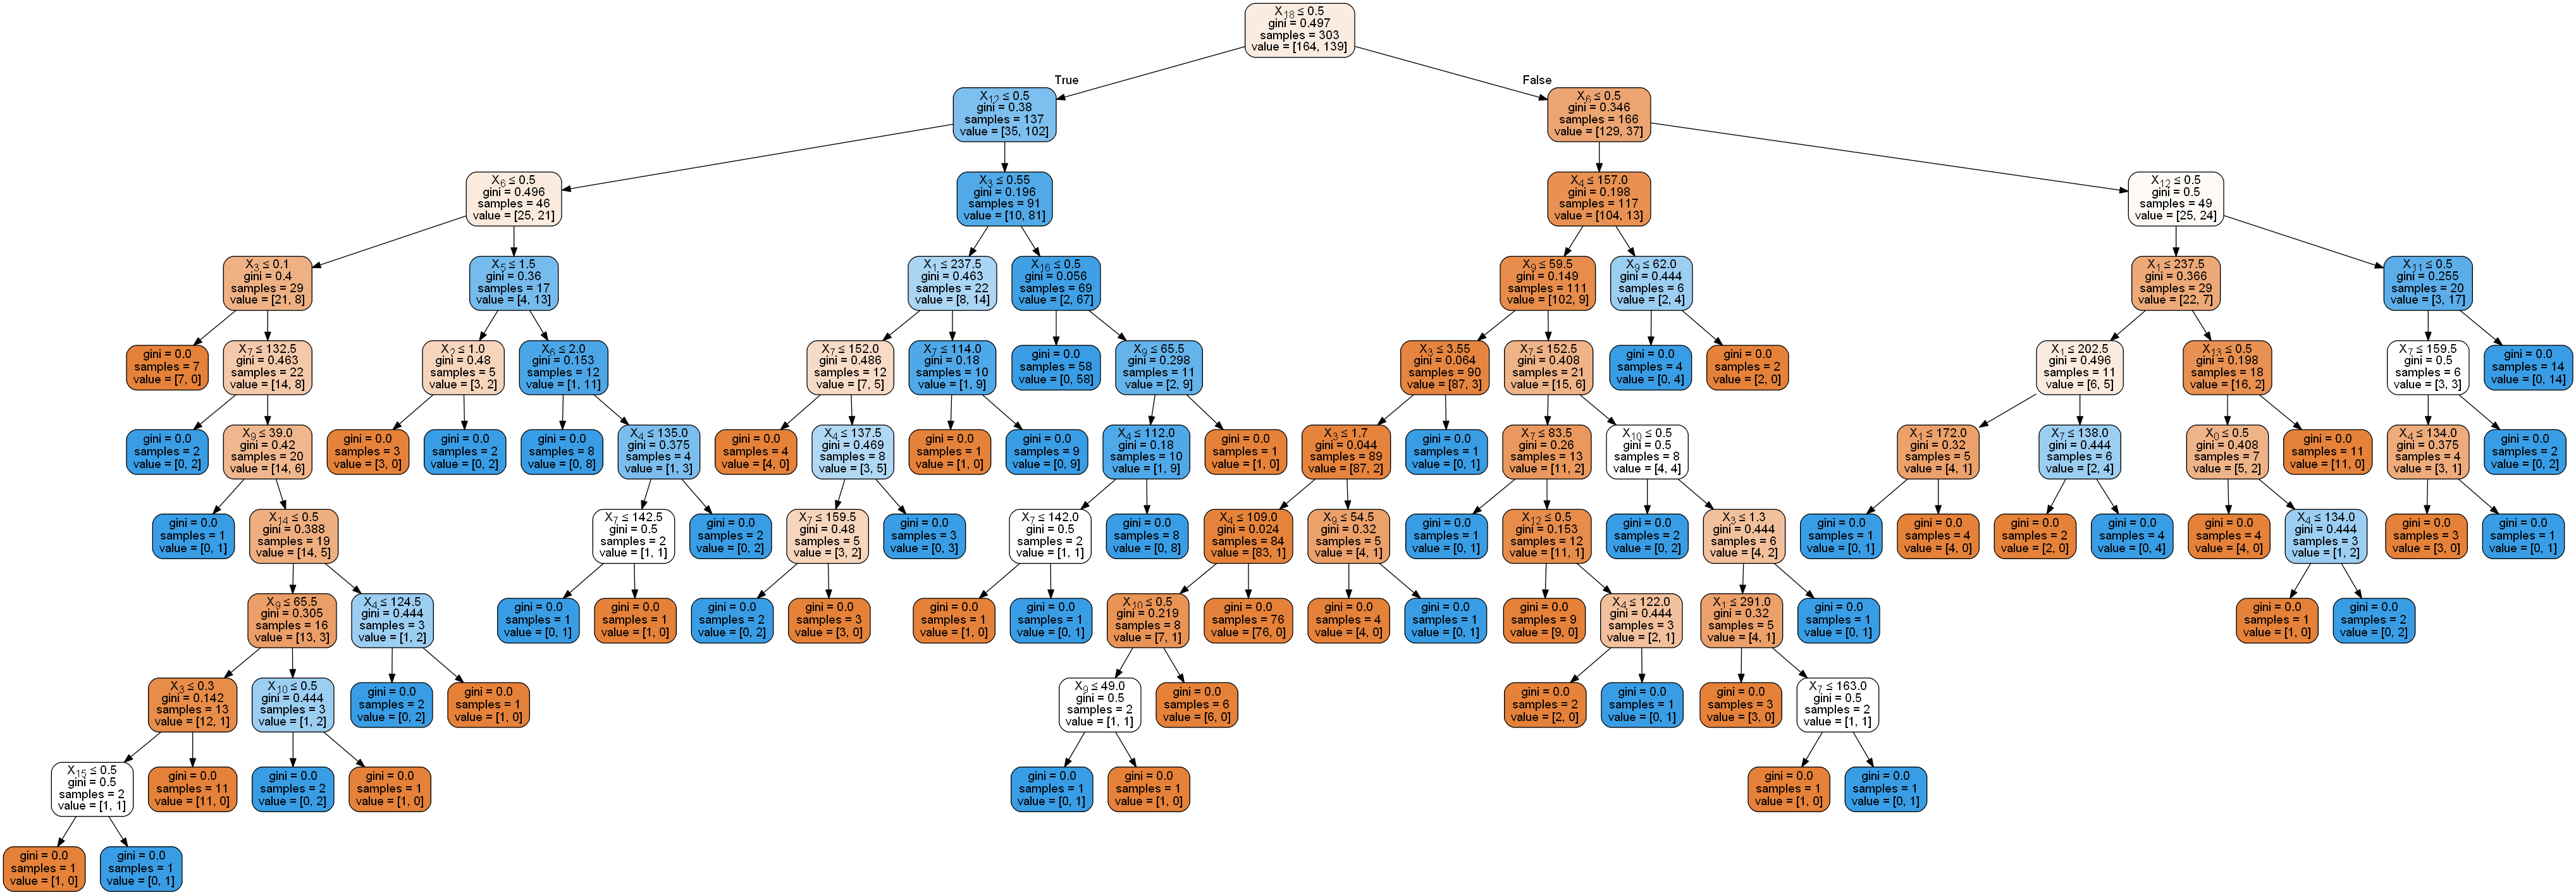

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[Text(168.0917355371901, 207.55636363636364, 'X[18] <= 0.5\ngini = 0.497\nsamples = 303\nvalue = [164, 139]'),
 Text(83.00826446280992, 187.7890909090909, 'X[12] <= 0.5\ngini = 0.38\nsamples = 137\nvalue = [35, 102]'),
 Text(44.27107438016529, 168.0218181818182, 'X[6] <= 0.5\ngini = 0.496\nsamples = 46\nvalue = [25, 21]'),
 Text(24.902479338842973, 148.25454545454545, 'X[3] <= 0.1\ngini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(19.368595041322315, 128.48727272727274, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(30.436363636363637, 128.48727272727274, 'X[7] <= 132.5\ngini = 0.463\nsamples = 22\nvalue = [14, 8]'),
 Text(24.902479338842973, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(35.970247933884295, 108.72, 'X[9] <= 39.0\ngini = 0.42\nsamples = 20\nvalue = [14, 6]'),
 Text(30.436363636363637, 88.95272727272729, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(41.50413223140496, 88.95272727272729, 'X[14] <= 0.5\ngini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Te

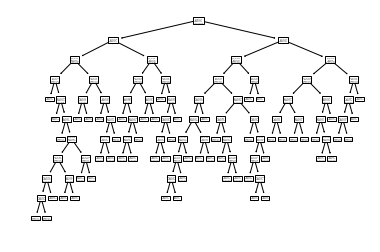

In [14]:
### There is another way to make the tree graph, but the visualization process is similar (we use export_graphviz)
from sklearn import tree
tree.plot_tree(clf.fit(Xt, y))

In [16]:
### We can add feature names since we know the order (note that it can be different from the original df.columns)
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=list(numeric_features)+list(new_cat_features),class_names=['No','Yes'],filled=True, rounded=True,special_characters=True)

In [17]:
import graphviz
graph = graphviz.Source(dot_data)

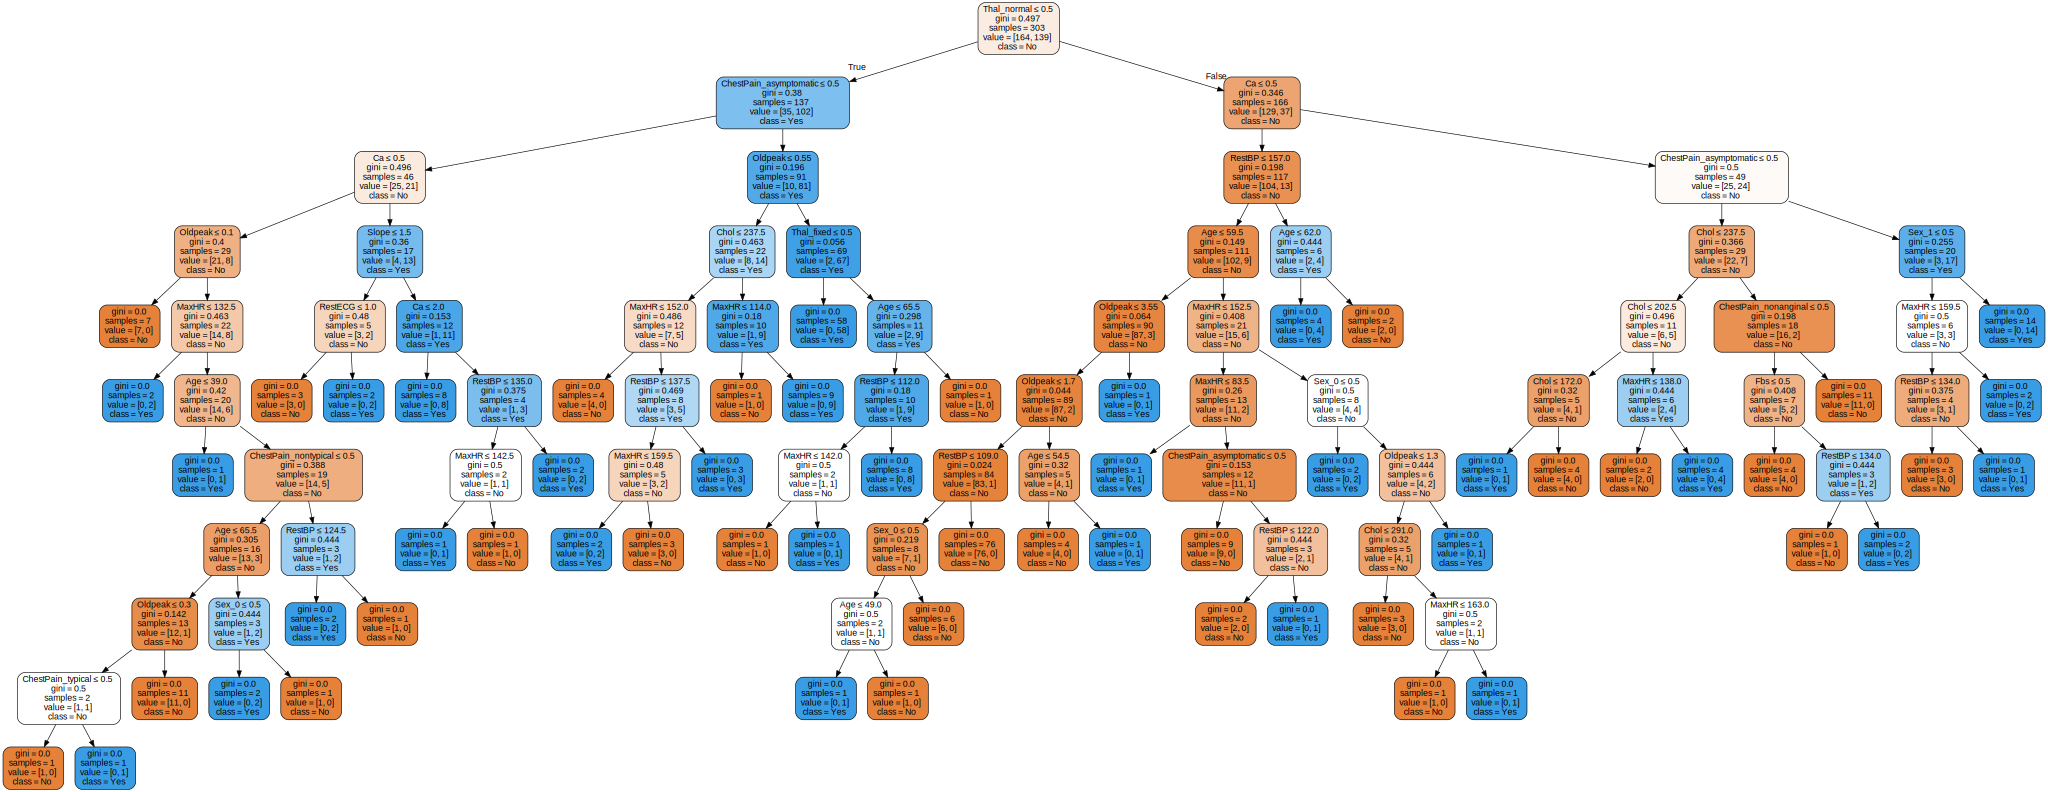

In [18]:
graph

# Exercise

### 1. Grow a decision tree classifier and change its options and visualize the tree to check what's happening
- 1.1 `max_depth`
- 1.2 `min_samples_split`
- 1.3 `min_samples_leaf`
- 1.4 `max_features`
- 1.5 `min_impurity_decrease`    
See the [document](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) for details.
                   

### 2. Pick a performance metric (for classification) and optimize those tuning parameters. Does a tree perform better when fully grown or early stopped using those parameters?

### 3. Use post pruning and find optimal `ccp_alpha` 
See sklearn [0.22 dev user guide](https://scikit-learn.org/dev/_downloads/scikit-learn-docs.pdf) section 6.30.4 Post pruning decision trees with cost complexity pruning. Optimal ccp_alpha can be chosen where test performance is the best in the graph on the page 1527.

### 4. Use Random Forest and plot the performance vs. number of trees.
- 4.1 What is optimum value for the number of trees?
- 4.2 Get the feature importance and draw a bar chart

### 5. Compare the performance of an optimized single tree and an optimized random forest ensemble in a graph where the y-axis is test error and the x-axis is number of trees.
(That means, the single tree is shown as a flat line)